## Discrete Fourier  (DFT)  and Fast Fourier transforms (FFT)

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 16})  # set font size for plots

### Concept

Data is normally produced by an instrument as a series of numbers measured at equal intervals, and not as an equation; therefore, any Fourier transform has to be calculated numerically. The sampling intervals could be time, distance, or some other quantity depending on the experiment. Time will be used in the following examples. The numerical transform is usually called a discrete Fourier Transform (DFT) and the algorithm used is called the fast Fourier Transform FFT. A frequently used algorithm was devised by Cooley and Tukey (1965) ( Bracewell 1986, p. 370 ). It is not necessary to devise one of these transforms, because the method is very well established and fast operating code has been written and checked. Explanations of its working can be found in texts such as Numerical Recipes (Prest et al. 1986). Python/Sympy, Maple and Mathematica each have built in discrete Fourier transform routines as do numerical packages such as python/numpy, MathCad, Matlab, IDL, IGOR and Origin. These routines can be used as black boxes, nevertheless a clear understanding of the discrete transform is essential to avoid making mistakes. Some examples of Fourier transforms are shown schematically in Fig. 36.

### 9.1 DFT equations

The cosine transform produces two delta functions at frequencies $\pm 1/p$ in the top figure, and $\pm 2/p$ in the second figure. Because the cosine period is halved, the frequency is doubled. The 'typical data', row (C), is supposed to represent some experimental data and if ideally transformed, with an infinite number of sampled points, will give the schematic spectrum on the right, which is shown only as its real part. If the transform is complex then the 'imaginary' or absolute parts may also contain useful information. The data has a large number of low frequencies in it but few high frequencies, which is why the transform tails off as the frequency increases. The maximum frequency present in the data is found to be $\nu_m$. In row (D), the function is sampled at times starting at zero and separated by $\Delta$, and a discrete transform is calculated. The highest frequency present in the transformed data can only be $1/\Delta$; the lowest frequency is $1/T$ where $T$ is the length of the data. To correctly sample the data $1/(2\Delta) \equiv \nu_c \gt \nu_m$; this is known as the Nyquist condition and is explained further below. 

The discrete transform is usually plotted in an unfolded form as shown in row (D), Fig. 36. Row (E) shows it in the same form as the ideal or mathematical transforms. Notice also that the frequency axis is $\nu/N$, where $\nu$, the frequency integer, is the index number of each point sampled and $N$ is the number of sampled points. The ratio $\nu/N$ is not the same as a conventional frequency, because both $\nu$ and $N$ are integers. 

There are a number of important differences between discrete transforms that relate to real experimental data and the ideal transforms of mathematical functions. These all relate to how the often the data has been sampled, which means how many data points are measured compared to how rapidly the data changes with time. Typically, $2^{13} = 8192$ to $2^{16} = 65536$ data points will be needed with actual data but for ease of calculation, smaller numbers are used in the examples below.

The discrete transform $g(\nu)$ of a signal $f(t)$ _sampled at discrete points_ $t$, is defined as

$$\displaystyle g(\nu)=\frac{1}{\sqrt{N}}\sum\limits_{t=0}^{N-1} f(t)e^{-2\pi i\, t\, \nu/N)  }  \tag{44}$$

where $N$ is the integer number of data points and $\nu$ and $t$ are also integers which means that $f(t)$ is a vector of data points at $t=0,1,2\cdots$.  As $g$ and $f$ are vectors it is common write these with subscripts, for example $\nu$ and $n$ meaning that the equation becomes

$$\displaystyle g_\nu=\frac{1}{\sqrt{N}}\sum\limits_{n=0}^{N-1} f_ne^{-2\pi i\, n\, \nu/N)  }\tag{44'}  $$

and this form is often how the transform is expressed. Notice that the exponential contains the product of two parameters $n\nu$ divided by the length of the data $N$.

The ratio $\nu/N$, which can only take on certain values because both $\nu$ and $N$ are integers, is unlike a true frequency which can take any value. The values of $\nu$ range from $0 \to N - 1$, and so the ratio $\nu/N$ takes only $N$ values which are 

$$\displaystyle \nu/N \to 0,\; 1/N, \cdots (N - 1)/N$$

Transforms with $\nu/N$ above $1/2$ do not contain any new data, but a copy of the earlier part of the spectrum. Therefore the transform must be treated with some care to avoid interpreting data in this second half of the spectrum as something different to that in the first. This means not interpreting a feature at an apparently high frequency as something different from its twin at low frequency. The first point, when $\nu$ is zero, where each of the exponential terms is unity, is the sum of the experimental data points.  

The symmetry of the transformed data is seen in Fig. 36. In terms of frequency, a point $\nu$ has a frequency $f = \nu/(N\Delta)$, the maximum frequency is $f = (N - 1)/(N\Delta)$ because the last point in the transform is numbered $N - 1$ and as $\Delta$ is the separation of any two data points, so $1/\Delta$ is a frequency. See Bracewell (1986) and Prest et al. (1986) for a more detailed discussion.

![Drawing](Fourier-fig36-top.png)
![Drawing](Fourier-fig36-btm.png)

Figure 36. Some Fourier transforms, (A) to (C), and a discrete transform (D). (Based in part on a web diagram of M. Levoy, Stanford University.)
______

The discrete transform algorithms require $2N$ sampled data points, where $N$ is an integer. If the data does not contain exactly $2N$ points, then zeros can be added to the end of the data to make up the number of points required. An example of a discrete transform is shown in Fig. 38; notice in particular where the data appears in the transform. The data being transformed is a set of points representing a square pulse and the transform in the figure is symmetrical about its centre except for the point at $\nu = 0$. Any data in the right-hand half of the transform can be ignored; it is a copy of that on the left. The complex exponential part of the transform, equation (44), represents the many roots of unity (Chapter 2) so can be represented as points on a circle on an Argand diagram Fig. 37.

![Drawing](Fourier-fig37.png)

Figure 37. Roots of a complex exponential represented as points on a circle.
_____

The zeroth and $(N - 1)^{th}$ points are adjacent on this circle as are the zeroth and first point; the $0^{th}$ and $N^{th}$ points are at the same position. This folding of the transform into a loop explains the symmetry. Points on the right-hand side have $1/2 \lt \nu/N \le (N - 1)/N$, which correspond to negative frequencies. The highest value $\nu/N$ can have to represent the data is $1/2$ for any number of data points. Suppose that the transform has $1024$ points; a point at position $t$ = 800 corresponds to 

$$\displaystyle \nu/N = 800/1024 \approx 0.7813$$

This ratio, however, should really be thought of as a negative frequency of 

$$\displaystyle f = (800 - 1024)/(1024\Delta) = -0.2187/\Delta$$

As Bracewell (1986) comments, 'This anomaly is a distinct impediment to the visualisation of the connection between the Fourier transform and the Discrete Fourier transform'. It also presents a practical problem; it is always necessary to determine where the true data is going to lie when transformed, because not all computer programs will necessarily return this in the first half of the array that contains all the transformed data.

![Drawing](fourier-fig38.png)

Figure 38. The real part of the discrete Fourier transform of a square pulse showing the symmetrical positioning of the resulting points. The data in the second half of the abscissa is the mirror image of the first half, except for the point at $\nu$ = 0. The smallest frequency is the reciprocal of the length of the sampled data, this is $T = N\Delta$ so the frequency is $f = 1/N\Delta$.
_________

You may consider that the transform looks rather odd in Fig. 38; it looks better if the data is rotated by $N/2$ points then it will look symmetrical. No new data is present - the effect is just cosmetic, but the result is more understandable and is shown in Fig. 39. The transform now looks like the mathematical transform of a square pulse; see the sinc function, Fig. 15. If the centre frequency is zero, the idea of positive and negative $\nu/N$ now seems more intuitive. If you wish you can imagine the transform rolled round a cylinder, cut down the middle (at zero) it gives figure 38, cut down the opposite side fig 39.

![Drawing](fourier-fig39.png)

Figure 39. The transform of Fig. 38 rotated by $N/2$ points, and clearly showing its symmetrical nature.
______

### 9.2 A four point DFT.

As an example, suppose that we have four samples $f_4=a_0,a_1,a_2,a_3$ at points $n=0,1,2,3$ and use the notation of equation 44'. The first thing to note is that the exponential term is always one of the the complex roots of unity, i.e. satisfying $z^N=1$. Let the $k^{th}$ root of the $N^{th}$ power be $w_N^k$ (as was done in section 2.5 in Matrices), then

$$\displaystyle w_N^k = e^{-2\pi i k/N}$$

the value of $w$ repeats because $w_N^N=e^{-2\pi i N/N} = -1$ so that $w_n^{k+n}=w_n^kw_n^n=w_n^k$.

As $N=4$ then $w_4=e^{-\pi i/2}=-i$ and  $w_4^n=(e^{-\pi i/2})^n=(-i)^n$ and we can use this to simplify the terms in the summation. The first term in the transform is the normalised sum of the signal because all the exponentials have a value of $1$. (The transform $g$ is multiplied by the normalisation (2) only for clarity)

$$\displaystyle \begin{align}
2g_0 &= a_0e^0+a_1e^0+a_2e^0+a_3e^0   = a_0+a_1+a_2+a_3\\ \\
2g_1&= a_0+a_1e^{(-2\pi i/4) 1}+a_2w_4^2+a_3w_4^3  \\ &= a_0+a_1(-i) +a_2(-i)^{2}+a_3(-i)^{3}= a_0-a_1i-a_2 + a_3i\\ \\
2g_2&= a_0+a_1w_4^2+a_2w_4^4+a_3w_4^6   =a_0-a_1+a_2-a_3\\ \\
2g_3&= a_0+a_1w_4^3+a_2w_4^6+a_3w_4^9  =a_0+a_1i-a_2-a_3i \end{align}$$

If the data is sampled from a sine wave of 1 Hz frequency at four equally spaced points $N=4$ the data would be $f=\begin{bmatrix}0,1,-1,0\end{bmatrix}$ measured at points $0, \pi/2, 3\pi/2, 2\pi$ which we label as $n = \begin{bmatrix}0&2&3&4\end{bmatrix}$ in egn 44'. The transform with $a_0=0, a_1=1, a_2=-1,a_3=0$ is

$$\displaystyle
g_0 = 0, \quad g_1 = -i+1, \quad g_2 = 0, \quad g_2 = i+1$$

If we plot what we would measure, which is the absolute value $g^*g$, this produces $\begin{bmatrix} 0& 2 & 0 & 2\end{bmatrix}/2$ which is a signal at frequency $1$ and again at $3$. The sine-wave can only has one frequency, in this case its value is $1$ so that any frequencies above $N/2$ should be ignored. They add nothing new to the data, but are in effect a reflection.

Looking at the individual terms of $g$ you can perhaps see that matrix of $w$ terms with different powers could be extracted and also a vector of the set of $a$ values. In the next section we show how the matrix form leads to a great simplification but doing the matrix-vector calculation in this form is very slow, however, by rearranging the matrices a fast algorithm, the Fast Fourier Transform is achieved. 

### 9.3 The DFT via a Circulant Matrix.

The DFT equation (eqn. 44) requires a great deal of computation, the sum is over $N$ points in time ($t=0\to N-1$ and then this is repeated at each of the $N$ frequencies $\nu$. This results in $N^2$ terms to be multiplied together which produces a slow calculation when $N$ is large. The important feature is the exponential which is $e^{-2\pi i/N(t/\nu)}$ and as such is one of the roots of unity, i.e. one of the $N$ solutions of the equation $z^N=1$, where $z$ is a complex number and $w$ a root which is also a complex number as just described in the four point example. Extracting a matrix from the $w$ values in this example forms a Circulant Matrix.

In describing the Huckel model for calculating the $\pi$ energies of aromatic molecules and also energy transfer on a polygon, circulant matrices were used (Chapter 7). These matrices are always square and are defined by just the first row and then all the other entries are made by rotating these values by one position row by row. This next matrix is circulant and also symmetrical

$$\displaystyle \begin{vmatrix} -a & b & 0  & b \\ b & -a & b & 0 \\0& b & -a & b \\b & 0 & b & -a\end{vmatrix}$$

Remarkably, the eigenvectors of the symmetric circulant matrix are always the same and are the powers of the $N$ roots of unity when the matrix is of size $N$. The eigenvectors $v_j,\;(j=0,1,2,\cdots n-1)$ are, 

$$\displaystyle v_j=\begin{bmatrix} w_j^0& w_j^1&w_j^2& \cdots &w_j^{n-1} \end{bmatrix}^T$$

If all the different eigenvectors make the columns of a matrix the result is 

$$\displaystyle \pmb x_n=\begin{bmatrix}1 & 1& 1& 1&\cdots\\1& w_n^1 & w_n^2 & w_n^3&\cdots \\1 & w_n^2 & w_n^4 & w_n^6 &\cdots \\1 & w_n^3 & w_n^6 & w_n^9&\cdots \\  \vdots & & &\vdots\\1 & w_n^{(n-1)k} & & & w_n^{(n-1)^2}\end{bmatrix}$$ 

and as $w^0=e^0 = 1$ the entries in the first row and column are always $1$. This type of matrix is sometimes called the Fourier Matrix.

To apply the DFT right multiply by the the signal we have measured $f(t)$, or equivalently $f_n$ eqn 44a, which we shall use as this is already a vector, giving

$$\displaystyle \qquad\qquad\qquad\vec g=\begin{bmatrix}1 & 1& 1& 1&\cdots\\1& w_n^1 & w_n^2 & w_n^3&\cdots \\1 & w_n^2 & w_n^4 & w_n^6 &\cdots \\1 & w_n^3 & w_n^6 & w_n^9&\cdots \\  \vdots & & &\vdots\\1 & w_n^{(n-1)k} & & & w_n^{(n-1)^2}\end{bmatrix}\begin{bmatrix} f_0\\f_1\\f_2\\f_3\\ \vdots \\f_{N-1}\end{bmatrix}\qquad\text{or}\qquad \vec g=\pmb F\vec f\qquad\qquad\text{     (44a)}$$

This is equivalent to the DFT equation 44 and could be written as $\vec g=\pmb F\vec f$. 

Matrix-vector multiplication can be considered as a row-wise dot product which gives the resulting sum 

$$\displaystyle g_0= f_0+f_1+f_2+\cdots + f_{N-1}$$

from the first row, the next two values are 

$$\displaystyle g_1=f_0+ w_N^1f_1+w_N^2f_2+\cdots+w_N^{(N-1)}f_{N-1}\\ g_2=f_0+ w_N^2f_1+w_N^4f_2+\cdots+w_N^{2(N-1)}f_{N-1}$$ 

and so on which means that the total calculation boils down to a simple, if perhaps rather large matrix, multiplication.

To help understand just what the matrix contains recall that the exponential part $e^{- 2\pi i t\nu/N}$ represents one of the $N^{th}$ roots of unity and this means that the exponential repeats itself with a period of $N$, just as sine and cosine do, i.e. $e^{i\theta}=\cos(\theta)+i\sin(\theta)$. Consequently the matrix $\pmb x$ can be simplified quite considerably by examining each term. As it is written it would seem that $N^2$ values would need to be calculated, but this is not so and in fact only $N$ are needed.  

The eigenvector matrix can easily be made directly, for example at position $j,k$ the entry is $x_n^{(j,k)} = w^{jk}=e^{-2\pi i/n( jk)}$. Now because of the repeating nature of the roots of unity (and of sine and cosine) only $N$ of the possible entries need to be calculated, in fact just a row and this is because the product $jk$ in the exponential can be replaced with $(jk)\; mod \;N$, which is the remainder after integer division of the product $jk$ with $N$ meaning that $jk$ is replaced by a number always in the range $0\to N-1$. 

This repeating effect can be understood from the properties of exponentials; $w_N=e^{-2\pi i/N}$ then $w_N^N=e^{-2\pi i}=1=w_n^0$. Similarly when there is a multiple of $N$ for example $mN$ then $w_N^{mN}=w_N^m=e^{-m2\pi i}$ or a sum $w_N^{m+N} = w_N^Nw^m = w^m = e^{-m2\pi i}$.

An example should make this clearer. The matrix is of size $6$ but $w_6^1$ etc. is replace by $ w^1$ etc. just for clarity and we label it as $\pmb F$ to indicate that it is a Fourier matrix.

$$\displaystyle \pmb F_6=\begin{bmatrix}1 & 1& 1& 1&1&1\\1& w^1 & w^2 & w^3 & w^4 & w^5 \\1 & w^2 & w^4 & w^6 & w^8 & w^{10}\\1 & w^3 & w^6 & w^9 & w^{12} &w^{15} \\ 1 & w^4 & w^8 & w^{12}& w^{16} & w^{20}\\1 & w^5 & w^{10} & w^{15} & w^{20} & w^{25} \end{bmatrix}$$ 
 
Applying the repeating nature of the powers produces 

$$\displaystyle \pmb F_6=\begin{bmatrix}1 & 1& 1& 1&1&1\\1& w^1 & w^2 & w^3 & w^4 & w^5 \\1 & w^2 & w^4 & w^0 & w^2 & w^4\\1 & w^3 & w^0 & w^3 & w^0 &w^3 \\ 1 & w^4 & w^2 & w^0& w^4 & w^2\\1 & w^5 & w^4 & w^3 & w^2 & w^1 \end{bmatrix}$$ 

Simplifying the matrix this way may not seem like much but if $N$ is large say $8000$ then only these many exponentials have to be calculated instead of $64$ million. However, matrix multiplication is rather slow in practice, and several methods of speeding up the calculation have been developed. The most commonly used method is a 'divide and rule' approach by Cooley and Tukey. This Fast Fourier Transform (FFT) algorithm works by computing the DFT for small subsets of the overall problem and then combining the results. For this reason it works fastest when $N$ is a power of $2$ and takes a time  $\approx n\log_2(n)$ to complete the calculation vs. $n^2$ for the direct DFT as shown above. This effect is actually rather dramatic, if $n=2^{12}=4096$ then by FFT the calculation takes $\approx 50000$ multiplications whereas a direct calculation $N^2\approx 17\cdot 10^6$, hundreds of times less. A lot of image analysis is done using FFT, noise removal etc., which would otherwise simply not be possible, an image containing $1064\times 1064$ pixels would need $\sim 10^{12}$ operations, which is impossible,  vs. $\sim 2\cdot 10^7$ which is easy.  

### 9.4 Fast fourier transform (FFT) calculation

The fast fourier transform idea works by dividing the data into two halves and then combining the result. The reason for doing this is that this will take $2(N/2)^2=N^2/2$ operations which is only half as many as the direct DFT on $N$ points. If the data is split in half again and then again and so on there is a similar reduction in the number of operations leading to the number $\approx N\log_2(N)$ for large $N$. The algorithm does not involve any new maths but rearranging the contents of the DFT matrix and the order of the data points. There are several variations on algorithms to do this but all involve repeatedly dividing the data into two equal parts and using recursion. For this reason the calculation is fastest when $N$ is a power of $2$ but even if it is not zero padding to reach this condition is still worth it.

Suppose we split the summation of eqn 44 into summations of even and odd indices. The new indices are $2m$ for even index terms $m$ and $2m+1)$ for odd where $m=0,1\cdots N/2-1$, and ignoring normalisation for clarity, gives 

$$\displaystyle g_\nu = \sum_{m=0}^{N/2-1}f_{2m}e^{-2\pi i\nu (2m)/N}+\sum_{m=0}^{N/2-1}f_{2m+1}e^{-2\pi i\nu (2m+1)/N}$$

rearranging this gives

$$\displaystyle g_\nu = \sum_{m=0}^{N/2-1}f_{2m}e^{-2\pi i\nu (2m)/N}+e^{-2\pi i\nu/N}\sum_{m=0}^{N/2-1}f_{2m+1}e^{-2\pi i\nu (2m)/N}\tag{44b}$$

and it can be seen that only $N/2$ summations are needed for each summation. The exponentials in the summations are the same in both halves and can be calculated before hand and saved. Furthermore, each summation can be further split into two parts and the odd and even _indices_ of each part treated in the same way. Thus each part is recursive and can continue until just two terms remain in each summation. 

The whole process can be made into a product of matrices, this looks very complicated but because most of the entries are zero or one the calculation is fast. The matrices are constructed in blocks of size $N/2 \times N/2$. The terms are $I_{N/2}$ which is the identity matrix (diagonal $1$'s with the rest zero, $D$ the diagonal of the powers of $w$ to $N/2-1$, and $F_{N/2}$ the fourier matrix for $N/2$ points, and finally the even-odd matrix contains only $1$ in any row at an even or odd position with all the rest being zero. This extracts the appropriate odd or even indexed term out of the $f$ vector which are the data points. (Note that the first point has index $0$). 

$$\displaystyle \qquad\qquad\qquad\qquad\qquad F_N= \begin{bmatrix}I_{N/2} & D\\I_{N/2} & -D\end{bmatrix}\begin{bmatrix}F_{N/2} & 0\\0 & F_{N/2}\end{bmatrix}\begin{bmatrix}even\\odd\end{bmatrix}\qquad\qquad\qquad\qquad\qquad \text{ (44c)}$$ 

and the complete calculation is $\vec g_n=\pmb F_N\vec f_N$. An important point to note is that in calculating the $F_{N/2}$ the $w$ values are related to $w_N$ as $w_N^2=w_{N/2}$. This shows just the first step, however, the matrices can be split into two again and so on and each time following the same procedure will speed up the calculation. 

By direct calculation the $F_4$ matrix is 

$$\displaystyle F_4= \begin{bmatrix}1&1&1 &1\\1&w&w^2&w^3\\1&w^2&w^4&w^6\\ 1&w^3&w^6&w^9\end{bmatrix}$$ 

and where $w=e^{-2\pi i/4} $ and which can be dissected into parts 

$$\displaystyle F_4= \begin{bmatrix}1&0&1 &0\\0&1&0&w\\1&0&-1&0\\ 0&1&0&-w\end{bmatrix}
\begin{bmatrix}1&1&0 &0\\1&w^2&0&0\\0&0&1&1\\ 0&0&1&w^2\end{bmatrix}
\begin{bmatrix}1&0&0 &0\\0&0&1&0\\0&1&0&0\\ 0&0&0&1\end{bmatrix}$$ 

The reason $w^2$ appears in the second matrix is that we used values from $F_4$ not $F_2$ because $w_N^2=w_{N/2}$.

The matrices can be understood starting the the right-hand one. We want to select even and odd terms out of the vector of data points $f_n$. As each row multiplied by $f$ is a dot product which is the sum of the products of the two values one from each. The top row produces

$$\displaystyle \begin{bmatrix}1&0&0&0\end{bmatrix}\cdot \begin{bmatrix}f_0\\f_1\\f_2\\f_3\end{bmatrix}= f_0+0f_1+0f_2+0f_3=f_0$$

and the second row

$$\displaystyle \begin{bmatrix}0&0&1&0\end{bmatrix}\cdot \begin{bmatrix}f_0\\f_1\\f_2\\f_3\end{bmatrix}= f_2$$

and so on, so this matrix simply sorts even and odd indexed data.

The middle matrix $\begin{bmatrix}F_{N/2} & 0\\0 & F_{N/2}\end{bmatrix}$ when multiplied by the even odd matrix to its right calculates each of the terms in the summations of eqn 44a and add them together. The left hand most matrix adds the $e^{-2\pi i \nu/N}$ terms just the the second (odd indexed) summation. The identity in this matrix leaves the left hand summation in eqn 44 unchanged. 

The next step is to halve the matrices again while still keeping the same overall size. Using the notation in eqn 44c this now becomes

$$\displaystyle \qquad\qquad F_N= \begin{bmatrix}I_{N/4} & D&\cdots&\cdots\\I_{N/4} & -D &\cdots&\cdots\\\cdots&\cdots&I_{N/4}& D\\\cdots&\cdots&I_{N/4}& -D\end{bmatrix}\begin{bmatrix}F_{N/4} & \cdots&\cdots&\cdots\\\cdots &  F_{N/4}&\cdots&\cdots\\\cdots&\cdots&F_{N/4}&\cdots\\ \cdots &\cdots& \cdots&F_{N/4}\end{bmatrix}\begin{bmatrix}even\\odd\end{bmatrix} \qquad\qquad\qquad\text{(44d)}$$ 

where $D$ is the diagonal of the powers of $w$ with length $N/4$ and the dots represent the appropriate number of zeros, and the even - odd matrix now has the order if $N=8$ of $f_0,f_4,f_1,f_5,f_2,f_6,f_3,f_7$ which is the original even - odd numbering with each of these split into even and odd indices. This is a permutation of the rows.  While such a doubling of each matrix may look cumbersome it is fast to achieve when coded as all that is involved is filling places in a matrix, no actual calculation until matrix multiplication begins.

Having explained all this in practice you should never need to write an FFT code, unless you crave the challenge,  but will always use built-in routines.

### 9.5 Nyquist Critical Frequency and Shannon Sampling Theorem

The Nyquist critical frequency has been mentioned in passing, but now it is explained more fully. An experimental set of data is band-limited (bandwidth limited), if its maximum frequency has essentially zero amplitude, as sketch (C) shows in Fig. 36. Because the signal's frequency has a maximum, this means that any feature in the signal cannot change faster than the reciprocal of this frequency. If the signal were conveying information, then anything changing faster than this frequency would be lost. The maximum sinusoidal wave that can be extracted or recovered from data by a discrete (Fourier) transform is given by the Nyquist critical frequency $\nu_c$ = 1/2$\Delta$, where $\Delta$ is the (time) interval between any two consecutive data points. Consider a set of experimental data points represented by a series of equally spaced points on the time axis separated by $\Delta$. The highest frequency in the data, is clearly when consecutive points have the opposite sign,

$$\displaystyle \begin{array}{lcc}
\mathrm{data} &=[&+1 & -1 & +1 & -1 & +1 &\cdots] \\
\mathrm{index}\; n &=[& 0& 1& 2& 3& 4 &\cdots]
\end{array}$$

and this series is equivalent to the function $\displaystyle e^{i\pi n/\Delta}$ if $\Delta =1, i=\sqrt{-1}$ and $t$ is the index number of a data point, 0, 1, 2... The exponential series with integer $n$ is 

$$\displaystyle e^0=1,\quad e^{i\pi}=-1,\quad e^{2i\pi}=1, \quad e^{3i\pi}=-1, \cdots$$

The highest frequency in the data $\omega_{max}$ occurs when $\displaystyle e^{in\omega_{max}}=e^{i\pi n/\Delta}$ or when $\omega_{max}=\pi/\Delta $ and as $\omega = 2\pi\nu$ the

$$\displaystyle  \text{Nyquist critical frequency (in Hz) is}\; \nu_c=\frac{1}{2\Delta}  \tag{45}$$

or two points per cycle. The lowest frequency is zero when all the points have the same value and sign; $[+1 +1 +1 +1 +1 \cdots ]$. A general digitized waveform therefore has frequencies that can range from 0 to the Nyquist critical frequency; the data may contain higher frequencies than this, but these cannot be measured if they are higher than the critical frequency. Therefore, if twice as many data points than before are sampled in a given time period, the Nyquist frequency increases, because $\Delta$ is then smaller and higher frequencies in the data can be transformed properly. Conversely, if $\Delta$ is too large, not enough sampling occurs and the data is not properly described, but this begs the question; how many points are too many and how many too few? The Shannon sampling theorem dictates exactly the minimum number of data points needed to ensure that data of a certain frequency is properly sampled. This theorem states that, 

$\quad$ **'for reliable replication of any waveform, two or more data points per period are required to define each sinusoid in the data'**

which means that the sampling frequency must be greater than twice the highest frequency in the signal

$$\displaystyle  \text{Shannon theorem} \quad \nu_{sample} \ge 2\nu_{max}   \tag{46}$$

Whether the Nyquist or Shannon condition applies depends on your particular situation. If you have some data, and for an instrumental reason can sample no higher than a certain value, any frequencies higher than the Nyquist will be under-sampled and not be measured properly. If on the other hand you can sample as often as you wish, no more samples than those predicted by the Shannon limit are needed. However, this sampling rate must apply to all the data even though its value is dictated only by the highest frequency present. If the data is not sampled frequently enough, then aliasing occurs and extra false signals are observed in the Fourier transform. This effect is described after a discrete transform has been calculated.

The Nyquist frequency has great implications for NMR and effectively dictates how the experiment is performed. A typical spectrometer operates at 400 MHz so that sampling should be done at $800$ MHz or every $1.25$ ns, which is a very tall order even with today's fast electronics. The amount of data collected would also be vast because the FID can last for several seconds, therefore, $\approx 8 \cdot 10^9$ points over $10$ seconds and perhaps four times as many bytes depending on the word size of the computer. However, the small frequency shift in the NMR signal from the RF frequency used to excite the nuclei comes to the rescue. This shift is only a few kHz, and if the NMR signal from the detector is mixed (heterodyned), with the frequency of the RF source beating will occur and the KHz frequency shift is extracted. (An analogue radio extracts the audio signal from the MHz broadcast frequency by a similar process.) After heterodyning, it is now relatively easy to sample the low frequency signal at a sufficiently high time resolution, in milliseconds not nanoseconds, to satisfy the Nyquist condition and accurately reproduce all frequencies in the signal. After a discrete Fourier transform, this signal becomes the NMR spectrum.

![Drawing](fourier-fig40.png)

Figure 40. A sine wave of decreasing amplitude and its sampling at two points per cycle; no more points are needed for such a sine wave. If the frequency changes with time, for example if the signal is chirped, then more data points are needed across the whole curve to describe the highest frequency correctly and for this reason most experiments over-sample the data.

______

### 9.6 Numerically calculating a ( DFT)  using the FFT algorithm
             
The DFT can easily be calculated using matrix multiplication as in equation 44a but its is very slow and instead a Fast Fourier Transform algorithm is universally used and built into most computer languages. As an illustration of numerically obtaining a discrete transform, some data will be synthesized and then transformed. Each data point is in principle a complex number, and therefore can be displayed in different forms: as the real and imaginary parts, as the absolute value, and as the phase. If $Z$ is a complex number, recall that the absolute value, which is also called the modulus or magnitude, is $| Z^*Z|^{1/2}$. The square of this, when plotted against frequency, is called the _power spectrum_. The  _phase_ of the signal, in radians, is defined as $\displaystyle \theta =\tan^{-1}\left(Im(Z)/Re(Z)  \right)$.

The data shown in Fig. 41, simulates the FID from a mock NMR experiment, with two spins producing NMR transition frequencies of $1/35$ and $1/20$ Hz. The FID comprises two cosines multiplied by an exponential decay with a $200$ s decay time, and extends to $1000$ seconds. In a real NMR experiment, $16384\; (2^{14})$ points would be typically used and the total time range would be a fraction of a second to a few seconds duration. The transition frequencies are typically in the $100$ to $500$ MHz, region but the actual frequency depends on the strength of the permanent magnetic field.

The time between any two data points is $\Delta = T/N$ where $T$ is the total time range of the data. In this example, this is $1000$ seconds, and the number of data points $N = 2048$. This time increment per point $\Delta$ is called tp in the calculation, and is $1000/204 \approx 0.488$. The maximum, or Nyquist frequency that can be calculated using this data is 1/(2$\Delta$) or 1.024 Hz and both frequencies are well below this. The real, imaginary, and phase parts of the transform are calculated and plotted against frequency in Hz, which is $\nu /(t_p \times N)$ where $\nu$ is the index number. We could also plot against the index number itself, or against angular frequency $2\pi\nu /(t_p \times N)$. It is important to decide what units are to be plotted. Note that the Nyquist frequency is measured in Hz, not angular frequency.

The calculation using python/numpy/matplotlib is shown below. Note that only the first half of the data is plotted in the FFT. Once the FFT is calculated the .real and .imag parts are plotted as is the phase. The vertical lines on the FFT plots are the two frequencies.

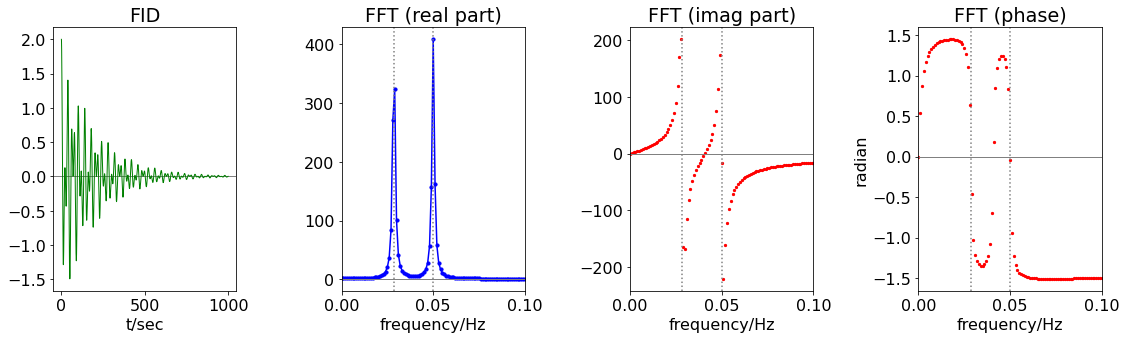

In [2]:
## example of calculating an FFT. 

fig1= plt.figure(figsize=(16.0,5.0))    # set up 4 plots in one window
ax0 = fig1.add_subplot(1,4,1)
ax1 = fig1.add_subplot(1,4,2)
ax2 = fig1.add_subplot(1,4,3)
ax3 = fig1.add_subplot(1,4,4)

nu1 = 1/20.0  # frequency Hz  (only for plotting make this biggest frequency)
nu2 = 1/35.0
FID = lambda t: np.exp(-t/200)*(np.cos(2*np.pi*nu1*t) +np.cos(2*np.pi*nu2*t))  # FID

maxt = 1000
N = 2**12                                # number of data points
tp = maxt/N
t  = np.linspace(0,maxt,N)               # make times to plot FID
nu = [i/(tp*N) for i in range(N)]        # make discrete frequencies to plot fft

ft = np.fft.rfft(FID(t))                 # do fft using in-built functions (use rfft as FID is not complex)

ax0.axhline(0,color='grey',linewidth=1)  # plot horizontal loine at zero 
ax0.plot(t,FID(t),color='green',linewidth=1)         # plot FID 
ax0.set_title('FID')
ax0.set_xlabel('t/sec')

ax1.plot(nu[0:N//2],ft[0:N//2].real, color='blue')  # plot real part of FFT as line
ax1.scatter(nu[0:N//2],ft[0:N//2].real,s=10, color='blue')  # plot real part of FFT as points
ax1.set_title('FFT (real part)')

ax2.scatter(nu[0:N//2],ft[0:N//2].imag,s=5,color='red') # plot imaginary
ax2.set_title('FFT (imag part)')

ax3.scatter(nu[0:N//2],np.arctan(ft[0:N//2].imag/ft[0:N//2].real),s=5,color='red')
ax3.set_title('FFT (phase)')
ax3.set_ylabel('radian')

for ax in [ax1,ax2,ax3]:                 # plot common features
    ax.axhline(0,color='grey',linewidth=1)  
    ax.axvline([nu1],linestyle='dotted',color='grey')
    ax.axvline([nu2],linestyle='dotted',color='grey')
    ax.set_xlim([0,2*nu1])
    ax.set_xlabel('frequency/Hz')

plt.tight_layout()
plt.show()

Figures 41 & 42 combined. Left: The time decaying FID, and next the real part of its discrete Fourier transform with frequencies of $1/35 = 0.0286$ and $1/20$ Hz. Only the first part of the spectrum is plotted; its mirror image at higher frequencies than the Nyquist limit of $1.024$ Hz is not shown. Right: Imaginary and phase plot (far right) of the transformed data. The phase is in radians; $\pi$ radians equals $180^\text{o}$. At larger frequencies, the phase approaches zero, reaching it at point $N/2$ or $1.024$ Hz, which is far to the right of the plotted range.
_____

### 9.7 Aliasing

Under-sampling means sampling at less than twice the highest frequency component in the data. This means that adjacent sampling points do not have a small enough separation to represent the highest frequency feature. The consequence of under-sampling a signal is erroneously to fold high frequency parts into the lower frequency parts of the Fourier transform; the effect is called _aliasing_.

A sufficient condition for the proper sampling of a sinusoidal signal is that the sampling frequency $\nu_s$ obeys $\nu_s /2 \ge \nu_{max}$. Suppose that for some reason, this condition cannot be met, then as the frequencies of sinusoids in the data increase from $\nu_s/2$, which is the maximum frequency for correct sampling, to $\nu_s$, these sinusoids are under-sampled and their apparent frequency moves down from $\nu_s/2$ to zero. To emphasize this, another name for the Nyquist frequency $\nu_s/2$ is the folding frequency, and the aliased data is sometimes called an 'image' or 'replica'. When a sinusoid of frequency $\nu_1$ is sampled with frequency $\nu_s$, the resulting samples are indistinguishable from those of replicate sinusoids at frequency $| \nu_1 - n\nu_s |$ where $n$ is any integer. The replica signals occur because a cosine with frequency $2\pi\nu$ is indistinguishable from one at frequency $2\pi\nu n$, because the cosine is periodic. When aliasing occurs, data from the adjacent higher frequency replica leak into the lowest primary one. The sketch, Fig. 43, attempts to show this. In the top sketch, the primary (normal) Fourier transform is shown as a solid line and replicates as dotted. When the sampling frequency $\nu_s$ is at least twice the maximum frequency present in the data, $\nu_{max}$ the replica and transform do not overlap. When this condition does not hold, lower sketch, then the transform and its replica do overlap, and frequencies are folded back into the transform, leading to erroneous data.

Choosing the sampling frequency may seem rather like the 'chicken and egg' situation, because the highest frequency has to be known before performing the transform to find out what the highest frequency is. However, knowing how often to sample the data is easy in practice and can be done in two ways: either ensure that several points sample any oscillatory feature, or frequency limit the data by filtering. More sampling points than are strictly necessary only make the computer calculation slower, but this is not nearly as much of a problem as it used to be. Alternatively, if your instrument cannot sample at the frequency you would like, the data should be filtered to remove frequencies above this in an attempt to limit the effects of aliasing. Such a filter is, not unsurprisingly, called an _anti-aliasing_ filter.

![Drawing](Fourier-fig43.png)

Fig. 43 Correct sampling (top) and under-sampling (bottom) leading to aliasing.
_____

An everyday example of aliasing may be seen on your television. You may have noticed how the spokes of a car or wheel, or markings on a tyre appear to move slowly backwards or forwards at a rate far smaller than is expected to be the true rate of rotation. This is very apparent in F1 motor racing and also in old Westerns with horse-drawn carriages.

The effect is due to the camera sampling the scene at too slow a rate to measure rapidly moving objects properly. Suppose spoke 1 is observed when the image is sampled. A short time later, the image is updated on the screen, but the wheel has rotated by a large angle and at the next observation time spoke 2 or even 3 is in the same, or almost the same position, as was spoke 1. As all the spokes look alike, spoke 1 appears to have moved only a small amount forwards or even backwards and the effect is very odd because the rapidly moving vehicle is seen with its wheel apparently moving backwards. The same effect may also be observed directly from the spokes of a car wheel when viewed through vertical railings.

In the Fourier transform, aliasing has to be taken very seriously or data will be mis-interpreted. Consider the curves shown below Fig. 44; the one on the left is an under-sampled, damped sine wave. The data, which would be recorded as the set of points shown, would appear as an exponential decay. Alternatively, if the samples were taken at a different time a straight line along the axis would be reported or perhaps as a rising exponential. This shows that the phase of the sampling is important; phase here means only where sampling is started. On the right, the data is over-sampled; more data points are present than are strictly necessary, but this is not a problem.

![Drawing](Fourier-fig44.png)

Figure 44. The figure on the left shows the under-sampling of a sine wave. The data, which is recorded as the set of points (shown as circles), would erroneously appear as an exponential decay not as a damped sine wave. On the right, the data is over-sampled; more data points are present than strictly needed.

______

The calculation shown in Fig. 45, illustrates the effect of aliasing on an oscillating signal with a constantly changing frequency. The data, accurately sampled with $4096$ points, is shown on the left and that with $256$ sampled points, on the right. The abscissa on each transform is $i/N$ for index $i$ and ranges from $0 \to 0.5$. The failure of the sampling to reproduce the high frequency part of the data is clearly seen in the under-sampled data (top right), where some data is missing. 

The real part of the transform (bottom right), apparently has much higher frequency data present, but this is the effect of aliasing as seen by comparison with the accurate real part of the transform (bottom left). The inset shows details up to $i/N = 0.05$. The aliased transform does also contain some correctly transformed data but only up to the Nyquist critical frequency of the 256 data points. You can see how the inset (bottom left) has a similar form to that in the aliased transform at low frequency, but only up to about five periods of the wave. The amplitude is also smaller than the true transform, because the total amount of transformed data is the same but spread out over more frequencies. Reconstructing the data from the aliased transform by reverse transforming produces the curve (top right) which is a very different from the true waveform shown top left.

To prevent aliasing, either the sampling rate has to be increased, or if this is not possible, the original data has to be filtered to remove higher frequencies. If the latter, the remaining transform will then be accurate, but only up to a certain frequency depending upon how filtering is performed.

Finally note that aliasing is not the only way that erroneous transforms can be produced. If the data suddenly ends, the transform will 'assume' that there is a sudden change in frequency, in effect a step function, and this will generate many unwanted frequencies in the transform. As an example, see the transform of a rectangular pulse, Fig. 15. It is better to apodise the original data, so that the final values are close to zero to prevent this. Apodising means multiplying the original data by a function, $\displaystyle e^{-x}$ for example, to make its values at long times, (its 'feet'), effectively zero (see Sanders & Hunter 1987).

![Drawing](fourier-fig45.png)

Figure 45. Calculations showing proper sampling, left-hand column, and under-sampling, (right), that produces the effect of aliasing. The transforms are plotted as a fraction of the total points. The inset has its $x$ axis multiplied by $10$.
_________

### 9.8 Zero filling

To increase resolution without increasing acquisition time, the data can be zero filled by adding enough zeros to the data to double its length, which means adding points to both the real and imaginary parts of the data, but only if the data has decayed to quasi-zero at the end of the acquisition period $T$. If the data has 2$N$ points, this means that another 2$N$ can be added to the end of the FID before Fourier transforming. The number of points in the real part of the spectrum is increased from the usual 2$N -1$ to 2$N$. With a computer, it is easy to add sets of 2$N$ points repeatedly to the end of the data. However, this does not increase resolution but in effect interpolates between data points. The effect is superficial; no extra information is obtained by adding a second and subsequent zero fills, but it does give nice smooth graphs.

### 10 Using Fourier transforms for filtering, smoothing, and noise reduction on data

### 10.1 Motivation

To the experimentalist, noisy data always presents a problem. The best option is always to go and do more experiments, but this is not always possible for any number of reasons. One option to improve the data is smoothing. Although it is rarely thought of as smoothing, one way of doing this on data showing a trend, is to perform a least-squares analysis. The parameters obtained, for example, the slope and gradient of a straight line with their associated standard deviations, provide a description of the data. If the data is not a straight line, then a polynomial fit may be used, and, if an exponential or other complex function, then a non-linear, least-squares may be necessary. However, smoothing data is often done independently and before any fitting is performed in an attempt to reduce the noise. 

As a rule of thumb, the noise and data can be split into three approximate classes: 

**(i)** The data is a slowly changing function and the noise is spiky, i.e. of high frequency; 

**(ii)** the converse, the noise is slowly varying and the data is of high frequency; and 

**(iii)** noise and data are of a similar frequency. 

In cases (i) and (ii) it is generally possible to separate noise and data; in (iii) this may not be possible.

The Savitsky - Golay method is an optimal polynomial fitting method that spans several data points at a time, replacing each with a mean value. It is available on most data analysis and graphics packages, the details of the calculation are complex and will not be examined here, but is a type of convolution and is good at removing noise spikes on data (Gorry 1990). If the data had an underlying slow trend on it, the rolling average method is also good if the noise is random and spiky on top of the data, see Section 10.4.

However, smoothing data is always a risky procedure because some of the data may inadvertently be removed with some of the noise, without you realizing it. Thus, the advice is always: _do not smooth the data if it can be avoided_. Having said this, a noisy signal must sometimes be 'cleaned up' to extract the signal from the noise, and a Fourier transform is a good way to do this. This approach is a little different to other smoothing methods, because by transforming the data it is possible to be very specific about what noise is removed. If the data to be improved is a one-dimensional time profile or a noisy image, the method is essentially the same: make a Fourier transform, look for the signal, remove unwanted frequencies and transform back again. If the noise is 'white' that is to say equally spread over all frequencies, and the signal wanted is a slowly varying periodic function or the converse then a Fourier transform may be what is needed.

### 10.2 Filtering and apodising

To filter the data first transform it, then remove some of the frequencies with a filter function. This filter will probably have to be chosen by hand, and will involve some trial and error. Finally, reverse the transform to obtain the smoothed data. There are a number of functions that can be used as filters; they are designed to extract the data and not to add unwanted frequencies back into it after the calculation. Filtering is similar to apodising the data. Apodising means multiplying the signal by an exponential, Gaussian, or other function, before transforming. The apodising filters are designed to remove extra oscillations at the foot of the signal, hence their name, but they do have the effect of broadening any features. The Connes filter is commonly used in FTIR spectroscopy; it has the form $(1 - (x - x_0)^2/a^2)^2$ where $x = \nu/N$ which ranges from 0 to 1, and $a$ is a parameter that the user can vary to optimize the signal, and $x_0$ is the position of the signal to be enhanced. This function looks very like the Gaussian bell-shaped curve. See Bracewell (1986) for several other filters.

### 10.3 Filtering a transform to remove noise

The example of filtering described next uses a square filter function, but the method is quite general. It is

$$\displaystyle \text{ Transform }\to \text{ Filter }\to \text{ Inverse Transform }$$

In filtering, the data is transformed, this is then filtered, and finally this is reverse transformed to recover the filtered data. The target signal is a simple sinusoid buried in noise, and is $\cos(2\pi\omega_0 i)+\cos(2\pi\omega_1 i)$ + rand($-5,5$ ), with $\omega_{0,1} = 50/n,30 /n$ and where rand($-5, 5$) is a uniformly distributed random number between $-5$ and $5$, making the 'noise' from the random numbers rather large compared to the signal; $i$ is the index number ranging from $1 \to n = 2^{10} = 1024$. The signal is so noisy that the casual observer might question whether it is anything but noise; Fig. 46. The Fourier transform immediately shows two frequencies and indicates that there is more that a single sine wave present; its frequency can be measured easily, but in most real experiments, the signal could be more complex so the data is filtered, then inverse transformed, to get at the true signal. 

![Drawing](fourier-fig46.png)

Figure 46. Noisy data (left) (with the underlying double cosine superimposed in red) and its Fourier transform (right) illustrating the frequencies hidden in noise can be identified. Only the first part of each data set is shown.

_______

The vertical lines on the Fourier transform, fig 46, show the regions selected and figure 47 the recovered signal and for comparison the original one used to generate the data but without noise. In generating the filter all values are set to zero except inside the two regions illustrated. (If it is known that the transform cannot be negative then negative values in the filter can be set to zero before inverse transforming.) If the whole of the data between the outer vertical dotted lines is transformed then the quality of the recovered data is poorer because list of intermediate values are included which add noise, (as sine waves of different frequencies) to the recovered signal.

![Drawing](fourier-fig47.png)
Figure 47. Reconstructed data obtained by filtering the Fourier transform and reverse transforming. Because of the Shannon theorem, very few data points are needed to reconstruct this signal and are determined only by those between the dotted lines in fig 46 all the rest being zero. 

_______

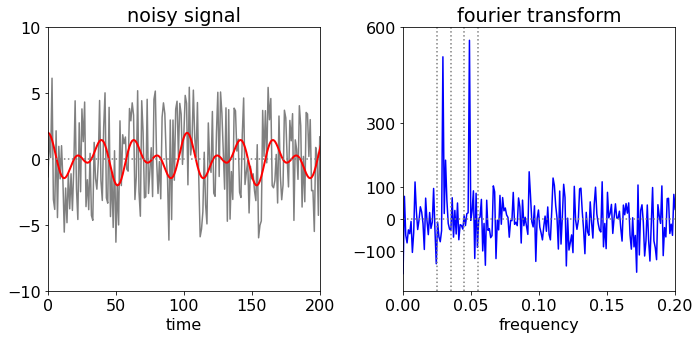

In [3]:
# due to random noise figure produced may not be the same as in fig 46 or 47

fig1= plt.figure(figsize=(10.0,5.0))   # calculate data in fig 46/47
ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)

n = 2**10
f01 = [ np.cos(2*np.pi*50/n*i)+ np.cos(2*np.pi*30/n*i)+10*(np.random.rand()-0.5) for i in range(n)]
f02=  [ np.cos(2*np.pi*50/n*i)+ np.cos(2*np.pi*30/n*i) for i in range(n)]

nu=[i/n for i in range(n)]

fft0=np.fft.rfft(f01).real

ax0.plot(f01,color='grey')
ax0.plot(f02,color='red',linewidth=2)
ax0.set_ylim([-10,10])
ax0.set_xlim([0,200])
ax0.axhline(0,color='grey',linestyle='dotted')
ax0.set_xlabel('time')
ax0.set_title('noisy signal')
ax0.set_yticks([-10,-5,0,5,10])

ax1.plot(nu[0:n//2],fft0[0:n//2],color='blue') 
ax1.axhline(0,color='grey',linestyle='dotted')
ax1.set_xlim([0,0.2])
ax1.axvline(0.045,color='grey',linestyle='dotted')
ax1.axvline(0.055,color='grey',linestyle='dotted')
ax1.axvline(0.025,color='grey',linestyle='dotted')
ax1.axvline(0.035,color='grey',linestyle='dotted')
ax1.set_title('fourier transform')
ax1.set_xlabel('frequency')
ax1.set_yticks([-100,0,100,300,600])

plt.tight_layout()
plt.show()

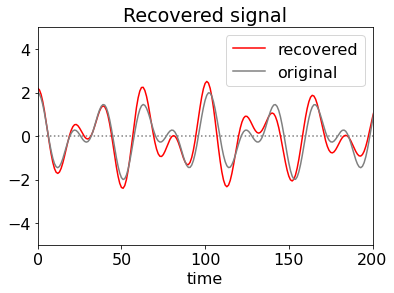

In [4]:
temp = [ fft0[i]  if (i/n >0.045 and i/n <0.055) or (i/n >0.025 and i/n <0.035)  else 0 for i in range(n//2)]
recover = np.fft.irfft(temp)

plt.axhline(0,color='grey',linestyle='dotted')
plt.plot(recover,color='red',label='recovered')
plt.plot(f02,color='grey',label='original')
plt.xlim([0,200])
plt.ylim([-5,5])
plt.title('Recovered signal')
plt.xlabel('time')
plt.legend()
plt.show()

The filter function above removes all but a few non-zero data points. This is only possible because the spikes in the transform are very sharp because each is a single frequency. If the signal were an exponential decay instead of a sine wave, then this Fourier method would perform very badly. The exponential is not periodic and is not described by single frequency but by a range of them in the form of a Lorentzian; in this and many other circumstances it is not easy to isolate the data from the noise. If Fourier and other smoothing methods fail then least squares fitting to a line or polynomial may be acceptable as a last resort.

### Rolling or moving average    

This method is widely used in the financial sector to smooth out fluctuations in the price of stocks and shares in an attempt to predict trends, it is also used to predict trends in data such as the number of infections and deaths in pandemics such as due to Covid-9. It is also a particularly good method of removing unwanted noise spikes in experimental data. These are not part of the noise normally expected on data but occur nevertheless because someone switches on an instrument elsewhere in the lab or there is a glitch in the mains power and so forth. Such spikes can completely ruin data so some way of removing them is necessary. The moving average method starts at the beginning of the data, and averages over a small odd number of the next few data points and this average is recorded. This averaging 'window' is moved by one point along the data and the new average recorded and so on. This process weights in some future and past data into any point and so if a spike is preset it is averaged away by the normal data on either side of it, see Fig. 48.

The mid-point moving average is is defined as  

$$\displaystyle s_i=\frac{1}{2n+1}\sum_{j=i-n}^{i+n} y_j $$

where $2n + 1$ is the width of the data window and $i$ runs along the data starting at point $n$ and ending $n - 1$ points from the end.

![Drawing](fourier-fig48a.png)

The method can be made into a recursive algorithm where the updating equation is

$$\displaystyle s_i = s_{i-1} + \frac{y(i+n) - y(i-n-1)}{2n + 1}$$ 

where the first point has to be explicitly calculated. The recursion works by considering the window at adjacent positions, subtracting the value that has just left the window and adding the one just entered. Although this method is not a Fourier method, it can be considered as a convolution of the data with a kernel function, which is a rectangular pulse with each of its $m$ points of size $1/m$.

![Drawing](fourier-fig48.png) 

Figure 48 . Left. Illustrating the moving averaging smoothing to remove spikes in noise. A filter with $n$ = 3 was used which is a window of 7 points.  The original data is grey, the smoothed data, red. Right.  Daily deaths  due to Covid19 in the USA for a few weeks after March 4, 2020. The original data is grey, the rolling average data, red. A 5 day average was used. 
__________

### The Hilbert Transform and the Analytic Signal

In some cases it is desirable to find the envelope of a signal, such as an FID or that of a pulse such as figure 35 in question 16. To do this the Hilbert transform is needed and with it the *analytic signal*. The analytic signal is defined as

$$\displaystyle s_A(t) = x(t) + iH\big(x(t)\big)$$

where $H(t)$ is the Hilbert transform and $i=\sqrt{-1}$. If the function describing a time varying signal is $x(t)$ and could be, for example, $\sin(2\pi t)e^{-at^2}$. This analytic function has the form of a complex number e.g. $(a+ib)$ and therefore can also be recast in a polar form as amplitude $a(t)$ with an exponential phase part, in which case, 

$$\displaystyle s_A(t)=a(t)e^{i\theta(t)},\qquad a(t)=\sqrt{x(t)^2+ H\big(x(t)\big)^2}, \qquad \theta=\tan^{-1}\left(\frac{H\big(x(t)\big)}{x(t)}\right)$$

The envelope of the oscillating signal $V$ is defined as 

$$\displaystyle V=\sqrt{x(t)^2+Re(iH\big(x(t)\big)^2}$$

and this is also the absolute value of the Hilbert transform or $|H\big(x(t)\big)|$. It is important to note that if the data $x(t)$ does not have any offset/baseline removed the envelope will oscillate just as the original signal does rather than being a smooth function.

The Hilbert transform has the effect of changing the phase of a sinusoidal signal by $\pi/2$ thus $\sin \leftrightharpoons \cos$. Formally it is

$$\displaystyle H(t)=\frac{1}{\pi}\int_{-\infty}^\infty \frac{x(k)}{t-k}dk$$

and some transforms are

$$\begin{array}
\hline
x(t) & &  H \\
\hline
\sin(\omega t)& \to & \sin(\omega t\pm\pi/2)&  (\mathrm{- if\; \omega >0\; else\;+})\\
\cos(\omega t)& \to & \cos(\omega t\pm\pi/2)&  (\mathrm{- if\; \omega >0\; else\;+})\\
e^{i\omega t}& \to & e^{i\omega t}e^{\pm\pi/2}&  (\mathrm{- if\; \omega >0\; else\;+})\\
\delta(t) & \to &\displaystyle  \frac{1}{\pi t}\\
\hline \end{array}$$

The effect of forming the analytic signal is to remove negative frequencies. To understand how this happens suppose that $x=2\cos(\omega t)$. Rewriting this as exponentials using Euler's equation

$$\displaystyle x=2\cos(\omega t)=e^{i\omega t}+e^{-i\omega t}$$

applying the Hilbert transform from the table above produces

$$\displaystyle H(t) = e^{i\omega t}e^{-i\pi/2}+e^{-i\omega t}e^{+i\pi/2}= -ie^{i\omega t}+ie^{-i\omega t}=2\sin(\omega t)$$

where the identity $e^{\pm i\pi/2}=\pm i$ was used after the first step.  

The analytic signal is then 

$$\displaystyle  x_A=x(t)+iH(t)=2\cos(\omega t)+2i\sin(\omega t)=2e^{i\omega t}$$

and the negative frequencies are lost.

In practice when we analyse an experimental signal the Hilbert transform has to be performed numerically. In this case the process can be split into three steps.

$\quad$**(a)** Calculate the fourier transform (FFT) of the signal.

$\quad$**(b)** Multiply positive frequencies by $-i$, negative by $i$ and make $f(0)=1$.

$\quad$**(c)** Calculate the inverse fourier transform.

Step (b) effectively maps the negative frequencies  onto the positive ones so simply doubles the positive signal.

The python code to do this is shown below. The function is that used in question 16, $x(t)=\cos(\omega t/a)e^{-(t/a)^2/2}$ with $a=5,\;\omega=10$.


In [5]:
def aHilbert(x):  # Calculate Hilbert Transform
    
    n = len(x)
    fx = np.fft.fft(x,n)                 # forwards FFT
    h = np.zeros(n,dtype=float)
    h[0] = 0.0
    h[1:n//2] = 2*np.ones(n//2-1)        # doubles positive frequencies (// is integer division)
    h[n//2] = 0.0
    H = np.fft.ifft(fx*h,n)              # back FFT
    return H
#---------------------------
n = 500                                  # number of data popints 
t = np.linspace(-20, 20, n)
x = np.zeros(n,dtype=float)

w = 10
a = 5
x = np.cos(w* t/a)*np.exp(-(t/a)**2/2)   # function

H = aHilbert(x)                          # Hilbert transform real + imag parts 
V = np.abs(H)                            # envelope  
xA= x + (1j*H).real                      # analytic signal 

# plot t vs V to see envelope, t vs x to see function.


![Drawing](fourier-fig48c.png)

Figure 48b. Left. The function $x(t)=\cos(\omega t/a)e^{-(t/a)^2/2}$ with $a=5,\;\omega=10$ and its envelope function $V=|H(x(t))|$  (red). The same function is shown in the middle panel, together  with the analytical signal $x_A$, and, right, are shown the real and imaginary parts of the Hilbert transform of $x(t)$. 